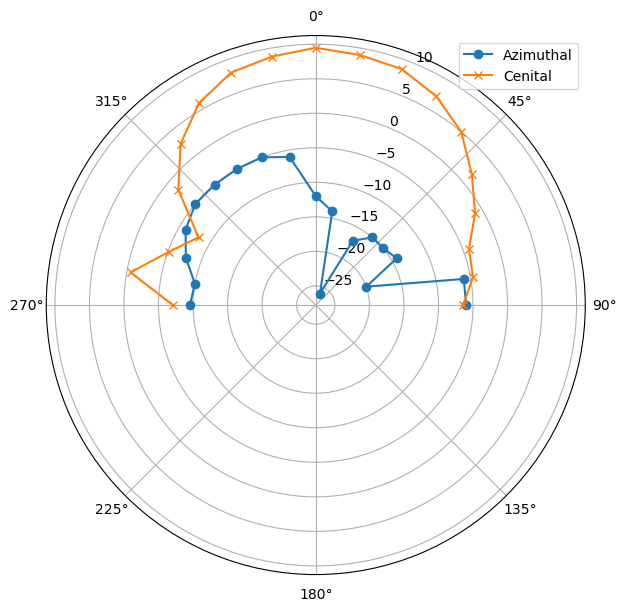

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Data for Azimuthal Angle
azimuthal_angle = np.radians([90, 80, 70, 60, 50, 40, 30, 20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80, -90])
azimuthal_gain = [-6, -6, -20, -14.232408, -15, -15, -17, -26, -14, -12, -6, -5, -5, -5, -5, -6, -7.756, -10, -9.556]

# Data for Zenital Angle
zenital_angle = np.radians([90, 80, 70, 60, 50, 40, 30, 20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80, -90])
zenital_gain = [-6.448, -4.648, -4.157, -1.123, 1.732, 5, 7.131, 8.603, 9, 9.483, 8.767, 8.062, 6.024, 2.685, -1.79, -8.169, -5.173, -0.545, -7.079]

# Create a polar plot
plt.figure(figsize=(7,7))



ax = plt.subplot(111, projection='polar')

# Plot azimuthal data
ax.plot(azimuthal_angle, azimuthal_gain, label='Azimuthal', marker='o')

# Plot zenital data
ax.plot(zenital_angle, zenital_gain, label='Cenital', marker='x')

# Add labels and title
#ax.set_title('Radiation Pattern', va='bottom')
ax.set_theta_zero_location('N')  # Set 0 degrees at the top
ax.set_theta_direction(-1)       # Clockwise direction

# Add legend
plt.legend()

# Show plot
plt.show()


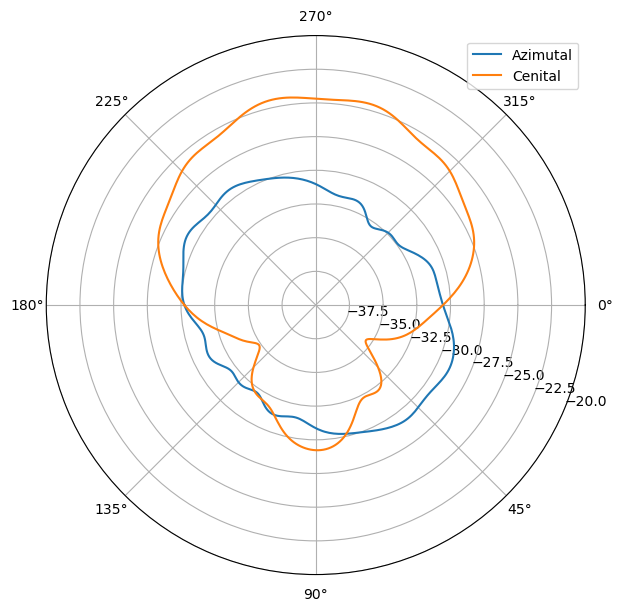

In [14]:
# Load CSV data
csv_file = 'pattern_hfss.csv'  # Update with your actual CSV file path
data = pd.read_csv(csv_file)

# Extract Theta and Gain columns
theta_deg = data["Theta [deg]"]
gain_phi_0 = data["dB(GainTotal) [] - Freq='1.09GHz' Phi='0deg'"]
gain_phi_90 = data["dB(GainTotal) [] - Freq='1.09GHz' Phi='90deg'"]
mask=False

if mask:
    # Filter data to include only angles from 0 to 180 degrees
    mask = (theta_deg >= -180) & (theta_deg <= 0)
    theta_deg = theta_deg[mask]
    gain_phi_0 = gain_phi_0[mask]
    gain_phi_90 = gain_phi_90[mask]

if not mask:
    # Extract Theta and Gain columns
    theta_deg = data["Theta [deg]"]
    gain_phi_0 = data["dB(GainTotal) [] - Freq='1.09GHz' Phi='0deg'"]
    gain_phi_90 = data["dB(GainTotal) [] - Freq='1.09GHz' Phi='90deg'"]



# Convert Theta to radians for polar plot
theta_rad_filtered = np.radians(theta_deg)

# Create the polar plot
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, projection='polar')

# Plot Phi=90° data
ax.plot(theta_rad_filtered, gain_phi_90, label="Azimutal")

# Plot Phi=0° data
ax.plot(theta_rad_filtered, gain_phi_0, label="Cenital")


# Add labels and title
#ax.set_title("Patrón de radiación simulado en HFSS", va='bottom')
ax.set_theta_zero_location('E')  # Set 0 degrees at the right (East)
ax.set_theta_direction(-1)       # Clockwise direction

# Set the radial limits to reflect dB range
ax.set_ylim(-40, -20)  # Adjust this range based on your data

# Add legend
plt.legend()

# Show the plot
plt.show()


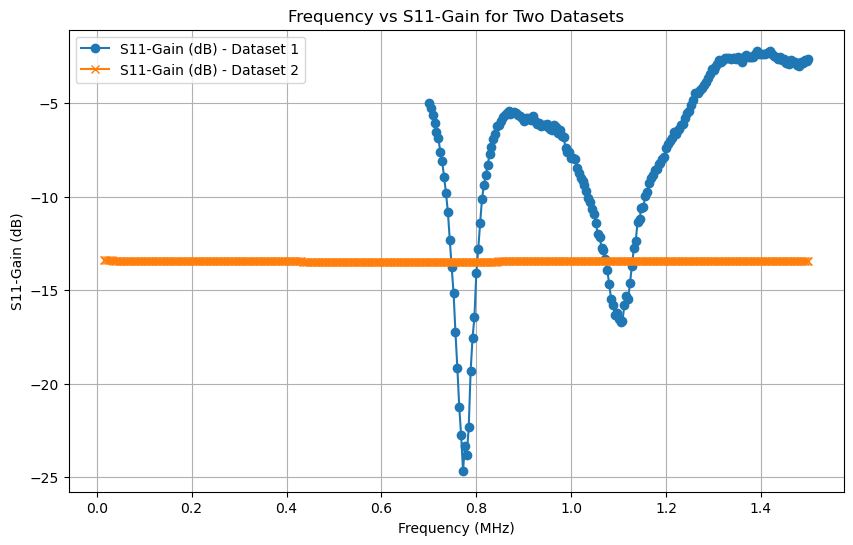

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load first CSV data (Frequency in Hz)
csv_file_1 = 'pablo.csv'  # Update with your actual CSV file path
data_1 = pd.read_csv(csv_file_1, delimiter=';')

# Load second CSV data (Frequency in GHz)
csv_file_2 = 'Simulación - Reflexión de entrada S(1,1).csv'  # Update with your actual CSV file path
data_2 = pd.read_csv(csv_file_2, delimiter=',')

# Extract data from first CSV
frequency_hz = data_1["Frequency"]
frequency_mhz = frequency_hz / 1e9  # Convert from Hz to MHz
s11_gain_1 = data_1["S11-Gain (dB)"]

# Extract data from second CSV
frequency_ghz = data_2["Freq [GHz]"]
frequency_mhz_2 = frequency_ghz  # Convert from GHz to MHz
s11_gain_2 = data_2["dB(S(1,1)) []"]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first dataset (Frequency in MHz vs S11-Gain)
plt.plot(frequency_mhz, s11_gain_1, label="S11-Gain (dB) - Dataset 1", marker='o')

# Plot the second dataset (Frequency in MHz vs S11-Gain)
plt.plot(frequency_mhz_2, s11_gain_2, label="S11-Gain (dB) - Dataset 2", marker='x')

# Add labels and title
plt.xlabel("Frequency (MHz)")
plt.ylabel("S11-Gain (dB)")
plt.title("Frequency vs S11-Gain for Two Datasets")
plt.grid(True)

# Add legend to differentiate the two datasets
plt.legend()

# Display the plot
plt.show()
